<a href="https://colab.research.google.com/github/scottspurlock/csc4422-s2025/blob/main/demos/day21_ann_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 21 Demo: Neural Networks in Scikit Learn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.neural_network import MLPClassifier

## Make some 2D data

In [2]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=5000, noise=0.05)

df = pd.DataFrame({'X0': X[:, 0],
                   'X1': X[:, 1],
                   'y': y})
df

,X0,X1,y
0,-0.033567,0.872100,0
1,-0.937585,0.476658,0
2,0.324837,0.982036,0
3,0.852672,0.569208,0
4,1.606689,-0.316735,1
...,...,...,...
4995,0.361028,1.051697,0
4996,0.982759,0.421158,0
4997,0.053007,0.172430,1
4998,-0.919521,0.247635,0


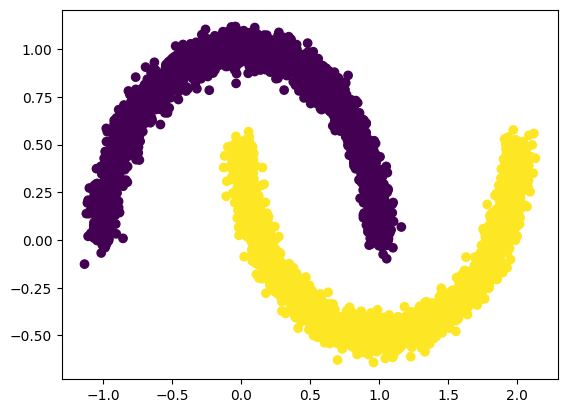

In [3]:
plt.scatter(df['X0'], df['X1'], c=df['y']);

## Split into training and testing sets

In [4]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)


## Neural nets are sensitive to data ranges
make sure to standardize or normalize

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only to the training data
scaler.fit(Xtrain)

# Now apply the transformations to the data:
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)


## Neural Net Model
Scikit Learn calls this a Multi-layer Perceptron (MLP). The original name for a neuron was "perceptron."

In [6]:
model = MLPClassifier(hidden_layer_sizes=(1),
                      solver='adam',
                      learning_rate_init=0.01,
                      activation='logistic',
                      batch_size=64,
                      max_iter=500,
                      early_stopping=True,
                      validation_fraction=0.1,
                      verbose=True)

model.fit(Xtrain, ytrain)

Iteration 1, loss = 0.71626399
Validation score: 0.670000
Iteration 2, loss = 0.65576226
Validation score: 0.870000
Iteration 3, loss = 0.55351920
Validation score: 0.857500
Iteration 4, loss = 0.46064386
Validation score: 0.862500
Iteration 5, loss = 0.40196561
Validation score: 0.867500
Iteration 6, loss = 0.36335521
Validation score: 0.872500
Iteration 7, loss = 0.33699779
Validation score: 0.877500
Iteration 8, loss = 0.31827213
Validation score: 0.887500
Iteration 9, loss = 0.30542205
Validation score: 0.890000
Iteration 10, loss = 0.29625862
Validation score: 0.887500
Iteration 11, loss = 0.28983342
Validation score: 0.890000
Iteration 12, loss = 0.28485775
Validation score: 0.890000
Iteration 13, loss = 0.28083952
Validation score: 0.890000
Iteration 14, loss = 0.27764849
Validation score: 0.890000
Iteration 15, loss = 0.27513979
Validation score: 0.890000
Iteration 16, loss = 0.27295387
Validation score: 0.890000
Iteration 17, loss = 0.27117140
Validation score: 0.890000
Iterat

MLPClassifier(activation='logistic', batch_size=64, early_stopping=True,
              hidden_layer_sizes=1, learning_rate_init=0.01, max_iter=500,
              verbose=True)

## loop through the model coefficients learned during fitting


In [7]:
for i, layer in enumerate(model.coefs_):
  print('Layer', i, 'has', layer.shape[0], 'nodes, each with', layer.shape[1], 'weight(s)')


Layer 0 has 2 nodes, each with 1 weight(s)
Layer 1 has 1 nodes, each with 1 weight(s)


In [8]:
model.best_validation_score_

0.89

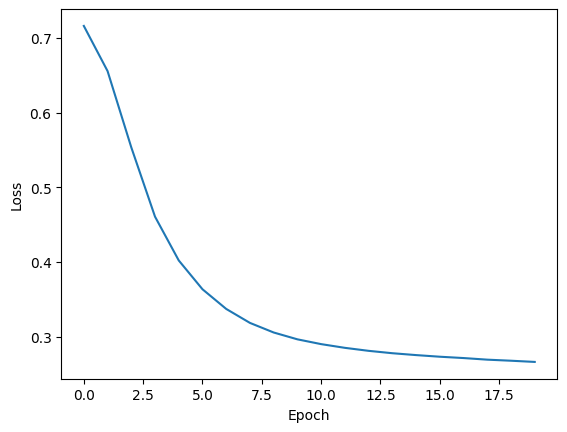

In [9]:
plt.plot(model.loss_curve_)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [10]:
# Evaluate the training data
print('--------------\nTrain Data\n----------------\n')
ypred = model.predict(Xtrain)
print(confusion_matrix(ytrain, ypred))
print(classification_report(ytrain, ypred))

# Evaluate the test data
print('--------------\nTest Data\n----------------\n')
ypred = model.predict(Xtest)
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))


--------------
Train Data
----------------

[[1808  202]
 [ 229 1761]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      2010
           1       0.90      0.88      0.89      1990

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.89      0.89      0.89      4000

--------------
Test Data
----------------

[[441  49]
 [ 60 450]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       490
           1       0.90      0.88      0.89       510

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



## Visualize decision boundary
This is only possible in 2D.

The code below makes a grid of points and then classifies them with the trained model to show where class 1 or 2 would be predicted.

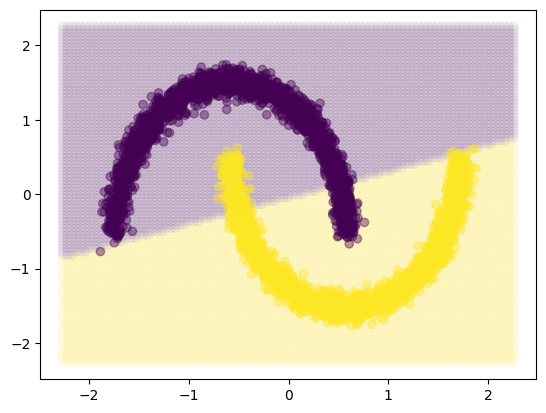

In [11]:
# Test data
x0 = np.linspace(1.2*Xtrain.min(), 1.2*Xtrain.max(), 101)
x1 = np.linspace(1.2*Xtrain.min(), 1.2*Xtrain.max(), 101)

# full coorindate arrays
xx, yy = np.meshgrid(x0, x1)
xx = np.reshape(xx,(-1, 1))
yy = np.reshape(yy,(-1, 1))

Xdisp = np.concatenate((xx, yy), axis=1)

ypred = model.predict(Xdisp)
alpha = 0.05
plt.scatter(xx, yy, c=ypred, s=40, alpha=alpha)
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=ytrain, alpha=0.4);